# Arvore de decisão para prever valores numéricos de GPA(media dos estudante)

## Importação dos dados

In [4]:
%matplotlib inline
from sklearn.tree import DecisionTreeRegressor, plot_tree
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import kaggle
from ydata_profiling import ProfileReport

In [2]:
path = (fr'..\data\processado\food_cleaned.csv')
df_processado = pd.read_csv(path)
df_processado.head()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,cook,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.400,2,1,430,0.0,315.0,1,none,we dont have comfort,2.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187.000000
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",3.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155.000000
2,3.300,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,159.173554
3,3.200,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,Unknow,3,1,1315,240.000000
4,3.500,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190.000000


## Seleção de variáveis	

Para explicar os valores da variável GPA pelo modelo (DecisionTreeClassifier) , seram utilizadas as variáveis exercise,income e nutricional_check, as mesmas foram escolhidas pelos motivos abaixo:<br>
**exercise**: Há sólida literatura mostrando correlação entre atividade física e desempenho acadêmico.<br>
**income**: Renda familiar é um fator socioeconômico crítico para desempenho acadêmico.<br>
**nutritional_check**: Comportamento de verificar nutrição pode ser proxy para hábitos sistemáticos/organizados.<br>



OBS: As variáveis features são ordinais, se fossem categoricas, precisariam de tratamento

In [5]:
X = df_processado[['exercise', 'income', 'nutritional_check']].copy()
y = df_processado['GPA']

In [6]:
print(X)

     exercise  income  nutritional_check
0         1.0     5.0                  5
1         1.0     4.0                  4
2         2.0     6.0                  4
3         3.0     6.0                  2
4         1.0     6.0                  3
..        ...     ...                ...
120       2.0     4.0                  5
121       2.0     2.0                  3
122       2.0     2.0                  3
123       1.0     4.0                  4
124       2.0     5.0                  5

[125 rows x 3 columns]


In [7]:

model = DecisionTreeRegressor(max_depth=3, min_samples_leaf=10)
model.fit(X, y)


DecisionTreeRegressor(max_depth=3, min_samples_leaf=10)

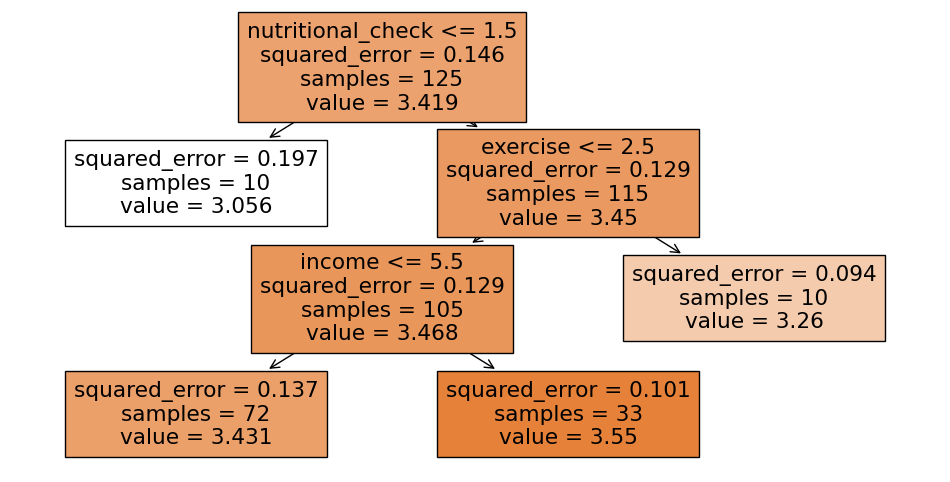

In [9]:
# Visualização
plt.figure(figsize=(12,6))
plot_tree(model, feature_names=X.columns, filled=True)
plt.show()